<a href="https://colab.research.google.com/github/lucianogaldino/Analise-Covid19/blob/master/covid19_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DESCRIPTION OF THE PROBLEM SITUATION**

The objective of this project is to analyze the evolution of cases of covid19 in Brazil, make a future forecast and compare with other countries. The data table was removed from the WHO website (https://covid19.who.int/table) on 09/04/2020.

## **STRATEGY FOR THE SOLUTION OF THE PROBLEM SITUATION**

After processing the data, an analysis of the regression algorithms of Machine Learning   (linear regression, polynomial regression, random forest, support vectors (SVR) and artificial neural networks) will be performed.

## **INITIAL ANALYSIS AND DATA PROCESSING**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sb

In [ ]:
covidmundial = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid19/COVID19.csv', sep=',')

In [ ]:
covidmundial

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
39428,2020-08-31,ZW,Zimbabwe,AFRO,6,6412,0,196
39429,2020-09-01,ZW,Zimbabwe,AFRO,85,6497,6,202
39430,2020-09-02,ZW,Zimbabwe,AFRO,62,6559,1,203
39431,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206


In [61]:
# Checking the max number of deaths in a day
nummortes = covidmundial.groupby('country').new_deaths.max()

In [56]:
nummortes

country
Afghanistan                                                 49
Albania                                                      6
Algeria                                                     43
Andorra                                                      4
Angola                                                       6
                                                            ..
Viet Nam                                                     3
Yemen                                                       53
Zambia                                                      40
Zimbabwe                                                    18
occupied Palestinian territory, including east Jerusalem     7
Name: new_deaths, Length: 216, dtype: int64

In [62]:
# Sort the countries with the highest number of deaths per day
nummortes.sort_values(ascending=False).head(10)

country
United States of America    6409
Peru                        3935
India                       2003
France                      2003
Brazil                      1595
China                       1290
The United Kingdom          1224
Mexico                      1091
Chile                       1057
Italy                        971
Name: new_deaths, dtype: int64

In [63]:
# Checking the total number of deaths by country
totaldeaths = covidmundial.groupby('country').cumulative_deaths.max()

In [64]:
# Sort the countries with the highest death rates
totaldeaths.sort_values(ascending=False).head(10)

country
United States of America      184614
Brazil                        123780
India                          68472
Mexico                         65816
The United Kingdom             41527
Italy                          35507
France                         30556
Peru                           29259
Spain                          29234
Iran (Islamic Republic of)     21926
Name: cumulative_deaths, dtype: int64

In [ ]:
covidbrasil = covidmundial.loc[covidmundial.country=='Brazil']

In [ ]:
covidbrasil.head()

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0


In [ ]:
covidbrasil.shape

(192, 8)

In [ ]:
covidbrasil.dtypes

date                 object
country_code         object
country              object
who_region           object
new_cases             int64
cumulative_cases      int64
new_deaths            int64
cumulative_deaths     int64
dtype: object

In [ ]:
covidbrasil.isnull().sum()

date                 0
country_code         0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

In [ ]:
covidmundial.isnull().sum()

date                   0
country_code         175
country                0
who_region             0
new_cases              0
cumulative_cases       0
new_deaths             0
cumulative_deaths      0
dtype: int64


175 records of attribute country_code were found as null values ​​(NaN), but this attribute will not be used in Machine Learning algorithms.

In [ ]:
covidmundial.loc[covidmundial.new_cases < 0, :]

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
25,2020-03-20,AF,Afghanistan,EMRO,-2,24,0,0
1095,2020-03-24,AG,Antigua and Barbuda,AMRO,-2,3,0,0
1636,2020-03-19,AW,Aruba,AMRO,-3,5,0,0
2414,2020-03-20,BS,Bahamas,AMRO,-3,4,0,0
2960,2020-03-20,BB,Barbados,AMRO,-1,5,0,0
...,...,...,...,...,...,...,...,...
36347,2020-03-19,TT,Trinidad and Tobago,AMRO,-2,9,0,0
37112,2020-05-25,UG,Uganda,AFRO,-8,304,0,0
37140,2020-06-22,UG,Uganda,AFRO,-68,755,0,0
38030,2020-03-21,VI,United States Virgin Islands,AMRO,-1,6,0,0


In [ ]:
# Checking negative values ​​in world records
covidmundial.loc[covidmundial.new_cases < 0, :].count()

date                 82
country_code         81
country              82
who_region           82
new_cases            82
cumulative_cases     82
new_deaths           82
cumulative_deaths    82
dtype: int64

In [ ]:
# Checking negative values ​​in Brazil records
covidbrasil.loc[covidbrasil.new_cases < 0, :].count()

date                 0
country_code         0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

82 records were found with negative values ​​for the attributes new_cases and new_deaths. This was for data corrections. None of these situations occurred in Brazil. After statistical analysis, it will be decided whether it is consistent to exclude these records from the database

In [ ]:
covidmundial_sum = covidmundial.groupby('date').agg({'new_cases': 'sum','cumulative_cases':'sum','new_deaths': 'sum','cumulative_deaths':'sum'}).reset_index()

In [ ]:
covidmundial_sum

,date,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-01-04,1,1,0,0
1,2020-01-05,0,1,0,0
2,2020-01-06,3,4,0,0
3,2020-01-07,0,4,0,0
4,2020-01-08,0,4,0,0
...,...,...,...,...,...
240,2020-08-31,267850,25144425,5417,844473
241,2020-09-01,212698,25357123,3980,848453
242,2020-09-02,248989,25606112,4370,852823
243,2020-09-03,279613,25885725,6317,859140


## **Analysis in each mounth between March and August in Brazil**

In [65]:
covidbrasil.loc[covidbrasil.index>=1,['date', 'new_deaths']].head(35)

,date,new_deaths
4896,2020-02-26,0
4897,2020-02-27,0
4898,2020-02-28,0
4899,2020-02-29,0
4900,2020-03-01,0
4901,2020-03-02,0
4902,2020-03-03,0
4903,2020-03-04,0
4904,2020-03-05,0
4905,2020-03-06,0


In [66]:
March = covidbrasil[4:35].copy()

In [67]:
March.head(30)

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
4901,2020-03-02,BR,Brazil,AMRO,0,6,0,0
4902,2020-03-03,BR,Brazil,AMRO,0,6,0,0
4903,2020-03-04,BR,Brazil,AMRO,1,7,0,0
4904,2020-03-05,BR,Brazil,AMRO,4,11,0,0
4905,2020-03-06,BR,Brazil,AMRO,1,12,0,0
4906,2020-03-07,BR,Brazil,AMRO,11,23,0,0
4907,2020-03-08,BR,Brazil,AMRO,0,23,0,0
4908,2020-03-09,BR,Brazil,AMRO,6,29,0,0
4909,2020-03-10,BR,Brazil,AMRO,0,29,0,0


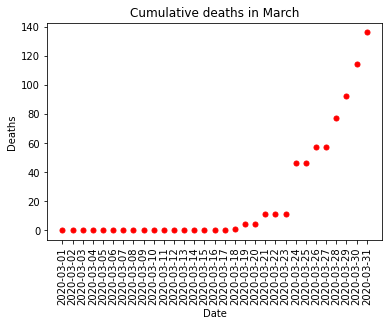

In [68]:
plt.figure()
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Cumulative deaths in March')
plt.scatter(March.date,March.cumulative_deaths, s=25, c='red')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


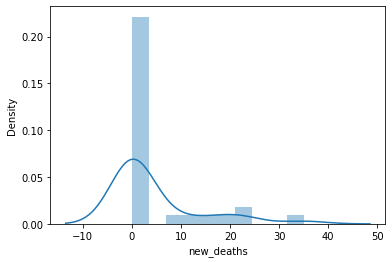

In [69]:
sb.distplot(March['new_deaths'], kde = True, bins=10)

In [70]:
April = covidbrasil[35:65].copy()

In [71]:
April

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4931,2020-04-01,BR,Brazil,AMRO,323,4579,23,159
4932,2020-04-02,BR,Brazil,AMRO,1138,5717,42,201
4933,2020-04-03,BR,Brazil,AMRO,1119,6836,40,241
4934,2020-04-04,BR,Brazil,AMRO,1074,7910,58,299
4935,2020-04-05,BR,Brazil,AMRO,1146,9056,60,359
4936,2020-04-06,BR,Brazil,AMRO,1222,10278,73,432
4937,2020-04-07,BR,Brazil,AMRO,852,11130,54,486
4938,2020-04-08,BR,Brazil,AMRO,926,12056,67,553
4939,2020-04-09,BR,Brazil,AMRO,1661,13717,114,667
4940,2020-04-10,BR,Brazil,AMRO,2210,15927,133,800


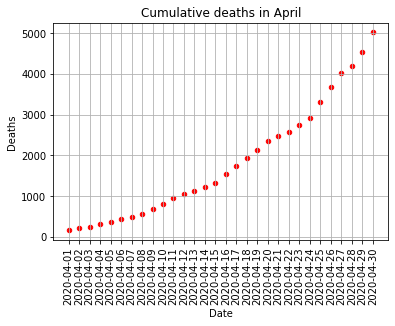

In [72]:
plt.figure()
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Cumulative deaths in April')
plt.scatter(April.date,April.cumulative_deaths,s=20, c='red')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


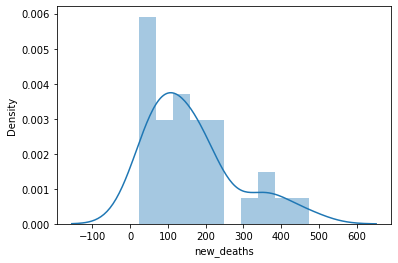

In [73]:
sb.distplot(April['new_deaths'], kde = True, bins=10)

In [74]:
May = covidbrasil[65:96].copy()
print(May)

            date country_code  ... new_deaths cumulative_deaths
4961  2020-05-01           BR  ...        449              5466
4962  2020-05-02           BR  ...        435              5901
4963  2020-05-03           BR  ...        428              6329
4964  2020-05-04           BR  ...        421              6750
4965  2020-05-05           BR  ...        275              7025
4966  2020-05-06           BR  ...        296              7321
4967  2020-05-07           BR  ...        600              7921
4968  2020-05-08           BR  ...        615              8536
4969  2020-05-09           BR  ...        610              9146
4970  2020-05-10           BR  ...        751              9897
4971  2020-05-11           BR  ...        730             10627
4972  2020-05-12           BR  ...        496             11123
4973  2020-05-13           BR  ...        396             11519
4974  2020-05-14           BR  ...        881             12400
4975  2020-05-15           BR  ...      

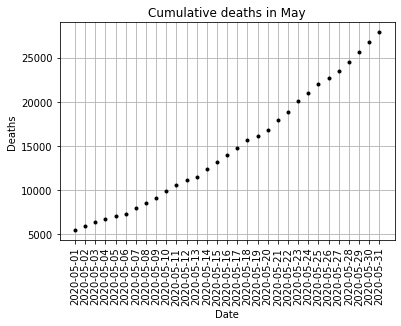

In [75]:
plt.plot()
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Cumulative deaths in May')
plt.plot(May.date,May.cumulative_deaths, 'k.')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


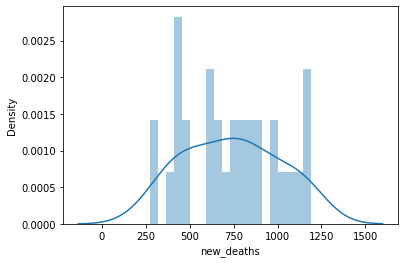

In [76]:
sb.distplot(May['new_deaths'], kde = True, bins=20)

In [77]:
June = covidbrasil[96:126].copy()
print(June)

            date country_code  ... new_deaths cumulative_deaths
4992  2020-06-01           BR  ...        956             28834
4993  2020-06-02           BR  ...        480             29314
4994  2020-06-03           BR  ...        623             29937
4995  2020-06-04           BR  ...       1262             31199
4996  2020-06-05           BR  ...       1349             32548
4997  2020-06-06           BR  ...       1473             34021
4998  2020-06-07           BR  ...       1005             35026
4999  2020-06-08           BR  ...        904             35930
5000  2020-06-09           BR  ...        525             36455
5001  2020-06-10           BR  ...        679             37134
5002  2020-06-11           BR  ...       1272             38406
5003  2020-06-12           BR  ...       1274             39680
5004  2020-06-13           BR  ...       1239             40919
5005  2020-06-14           BR  ...        909             41828
5006  2020-06-15           BR  ...      

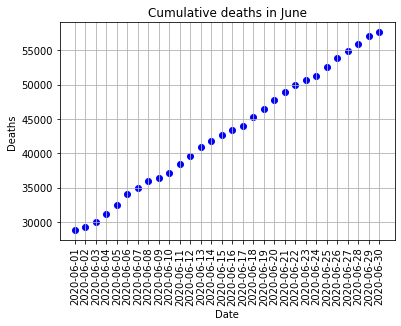

In [78]:
plt.figure()
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Cumulative deaths in June')
plt.scatter(June.date,June.cumulative_deaths, c = 'blue')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


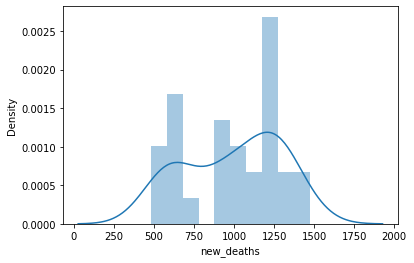

In [79]:
sb.distplot(June['new_deaths'], kde = True, bins=10)

In [80]:
July = covidbrasil[125:157].copy()
print(July)

            date country_code  ... new_deaths cumulative_deaths
5021  2020-06-30           BR  ...        552             57622
5022  2020-07-01           BR  ...        692             58314
5023  2020-07-02           BR  ...       1280             59594
5024  2020-07-03           BR  ...       1038             60632
5025  2020-07-04           BR  ...       1252             61884
5026  2020-07-05           BR  ...       1290             63174
5027  2020-07-06           BR  ...       1091             64265
5028  2020-07-07           BR  ...        602             64867
5029  2020-07-08           BR  ...        620             65487
5030  2020-07-09           BR  ...       1254             66741
5031  2020-07-10           BR  ...       1223             67964
5032  2020-07-11           BR  ...       1220             69184
5033  2020-07-12           BR  ...       1214             70398
5034  2020-07-13           BR  ...       1071             71469
5035  2020-07-14           BR  ...      

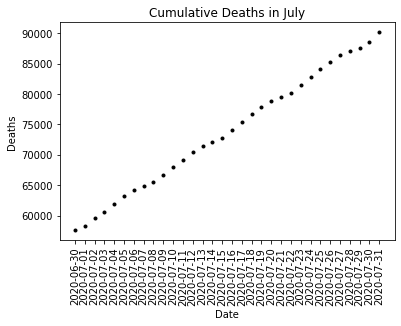

In [81]:
plt.plot()
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Cumulative Deaths in July')
plt.plot(July.date,July.cumulative_deaths, 'k.')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


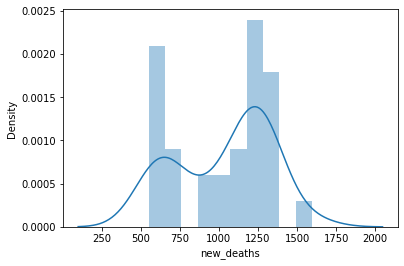

In [82]:
sb.distplot(July['new_deaths'], kde = True, bins=10)

In [83]:
August = covidbrasil[157:188].copy()
print(August)

            date country_code  ... new_deaths cumulative_deaths
5053  2020-08-01           BR  ...       1129             91263
5054  2020-08-02           BR  ...       1212             92475
5055  2020-08-03           BR  ...       1088             93563
5056  2020-08-04           BR  ...        541             94104
5057  2020-08-05           BR  ...        561             94665
5058  2020-08-06           BR  ...       1154             95819
5059  2020-08-07           BR  ...       1437             97256
5060  2020-08-08           BR  ...       1237             98493
5061  2020-08-09           BR  ...       1079             99572
5062  2020-08-10           BR  ...        905            100477
5063  2020-08-11           BR  ...        572            101049
5064  2020-08-12           BR  ...        703            101752
5065  2020-08-13           BR  ...       1274            103026
5066  2020-08-14           BR  ...       1175            104201
5067  2020-08-15           BR  ...      

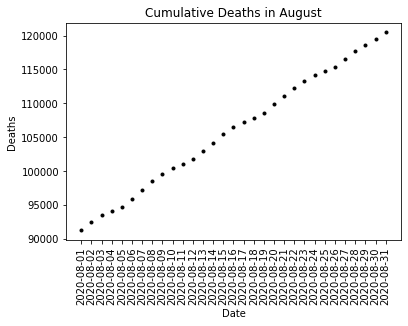

In [84]:
plt.plot()
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Cumulative Deaths in August')
plt.plot(August.date,August.cumulative_deaths, 'k.')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


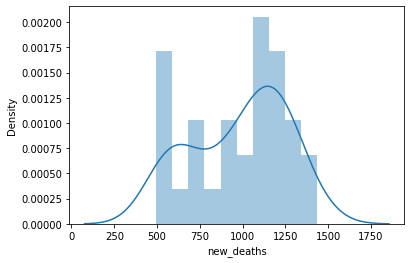

In [85]:
sb.distplot(August['new_deaths'], kde = True, bins=10)

## **STATISTICAL ANALYSIS**

In [86]:
covidmundial_sum.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,245.000000,2.450000e+02,245.000000,245.000000
mean,106820.865306,6.645875e+06,3531.240816,292884.012245
std,96260.245061,7.713624e+06,2598.699053,282859.017866
min,0.000000,1.000000e+00,0.000000,0.000000
25%,3919.000000,9.757600e+04,144.000000,3346.000000
50%,85754.000000,3.528783e+06,4233.000000,249991.000000
75%,191046.000000,1.112907e+07,5465.000000,524725.000000
max,297794.000000,2.617111e+07,12430.000000,865154.000000


In [87]:
covidbrasil.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,192.000000,1.920000e+02,192.000000,192.000000
mean,20822.213542,1.097211e+06,644.687500,41098.796875
std,19158.201448,1.268914e+06,482.608603,41370.781794
min,0.000000,5.000000e+00,0.000000,0.000000
25%,1819.250000,2.180850e+04,114.750000,1198.250000
50%,17259.000000,4.818030e+05,631.500000,28356.000000
75%,38775.500000,2.020695e+06,1112.750000,76978.750000
max,69074.000000,3.997865e+06,1595.000000,123780.000000



## **CORRELATIONS**

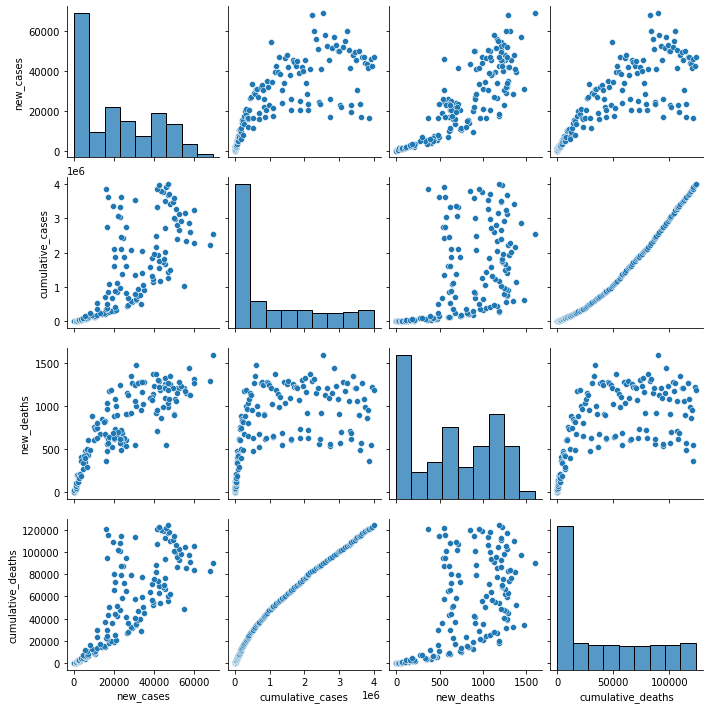

In [88]:
sns.pairplot(covidbrasil)

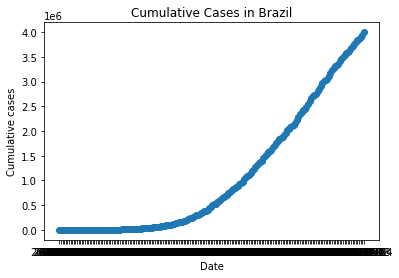

In [89]:
plt.scatter(covidbrasil.date,covidbrasil.cumulative_cases)
plt.xlabel('Date')
plt.ylabel('Cumulative cases')
plt.title('Cumulative Cases in Brazil')
plt.show()

In [90]:
correlacoes = covidbrasil.corr()

In [91]:
correlacoes

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
new_cases,1.000000,0.792903,0.887510,0.845639
cumulative_cases,0.792903,1.000000,0.605844,0.988883
new_deaths,0.887510,0.605844,1.000000,0.691147
cumulative_deaths,0.845639,0.988883,0.691147,1.000000


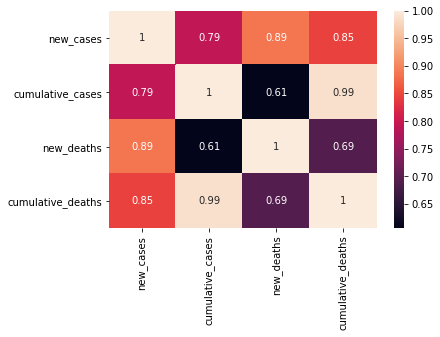

In [92]:
plt.figure()
sns.heatmap(correlacoes, annot=True)

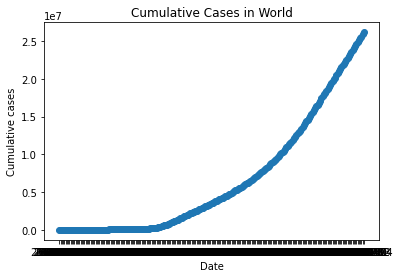

In [93]:
plt.scatter(covidmundial_sum.date,covidmundial_sum.cumulative_cases)
plt.xlabel('Date')
plt.ylabel('Cumulative cases')
plt.title('Cumulative Cases in World')
plt.show()

In [94]:
correlacoes2 = covidmundial_sum.corr()

In [95]:
correlacoes2

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
new_cases,1.000000,0.944187,0.760575,0.967044
cumulative_cases,0.944187,1.000000,0.601376,0.972804
new_deaths,0.760575,0.601376,1.000000,0.686943
cumulative_deaths,0.967044,0.972804,0.686943,1.000000


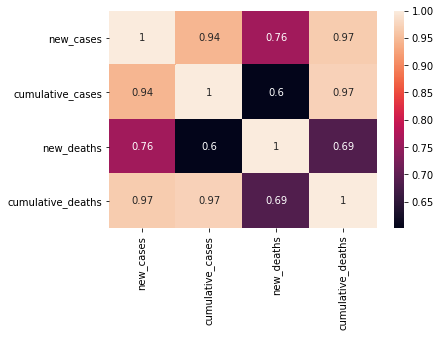

In [96]:
plt.figure()
sns.heatmap(correlacoes2, annot=True)

Text(0.5, 1.0, 'Evolution Cumulative Cases and Deaths in Brazil')

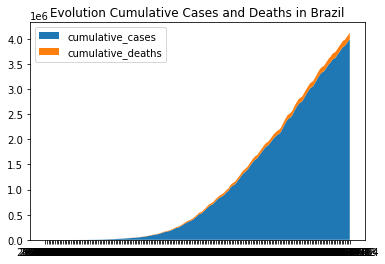

In [97]:
plt.stackplot(covidbrasil['date'], [covidbrasil['cumulative_cases'], covidbrasil['cumulative_deaths']],
              labels = ['cumulative_cases', 'cumulative_deaths'])
plt.legend(loc = 'upper left')
plt.title('Evolution Cumulative Cases and Deaths in Brazil')

Text(0.5, 1.0, 'Evolution Cumulative Cases and Deaths in World')

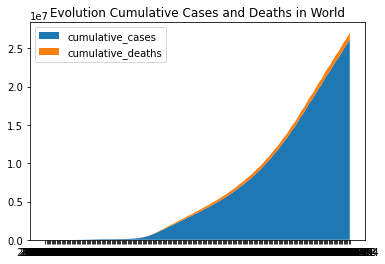

In [98]:
plt.stackplot(covidmundial_sum['date'], [covidmundial_sum['cumulative_cases'], covidmundial_sum['cumulative_deaths']],
              labels = ['cumulative_cases', 'cumulative_deaths'])
plt.legend(loc = 'upper left')
plt.title('Evolution Cumulative Cases and Deaths in World')

## **MACHINE LEARNING**

## POLINOMIAL REGRESSION

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
x = covidbrasil.drop(['country_code','country','who_region','new_cases','cumulative_cases','new_deaths','cumulative_deaths'], axis=1)						

In [101]:
x

,date
4896,2020-02-26
4897,2020-02-27
4898,2020-02-28
4899,2020-02-29
4900,2020-03-01
...,...
5083,2020-08-31
5084,2020-09-01
5085,2020-09-02
5086,2020-09-03


In [102]:
x = np.arange(len(x)).reshape(-1,1)#transformou as datas em índices (0,1,2,3,4...)

In [103]:
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [104]:
y = covidbrasil.iloc[:, 5].values

In [105]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,test_size = 0.3,shuffle = False, random_state = 0)

In [106]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_treinamento_poly = poly.fit_transform(x_treinamento)
x_teste_poly = poly.transform(x_teste)

In [107]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_treinamento_poly, y_treinamento)
score = regressor.score(x_treinamento_poly, y_treinamento)

In [108]:
previsoes = regressor.predict(x_teste_poly)

In [109]:
score

0.9848117026407015

In [110]:
from sklearn.metrics import mean_absolute_error

In [112]:
poly_teste_pred = regressor.predict(x_teste_poly)

In [113]:
print('MAE:', mean_absolute_error(poly_teste_pred, y_teste))
print('MSE:', mean_squared_error(poly_teste_pred, y_teste))
print('RMSE:', np.sqrt(mean_absolute_error(poly_teste_pred, y_teste)))

MAE: 130819.22155164507
MSE: 19941217834.040596
RMSE: 361.68939928016283


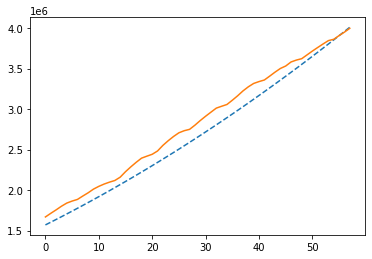

In [114]:
plt.plot(poly_teste_pred, linestyle = 'dashed')
plt.plot(y_teste)

In [115]:
forecast = np.arange(len(x) + 20).reshape(-1,1)#forescat significa previsão. ) + 20 é uma previsão de 20 dias a mais.

In [116]:
forecast.shape

(212, 1)

In [117]:
print(forecast)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [118]:
x_train_all = poly.transform(forecast)
x_train_all.shape

(212, 3)

In [119]:
poly_pred_all = regressor.predict(x_train_all)
len(poly_pred_all)

212

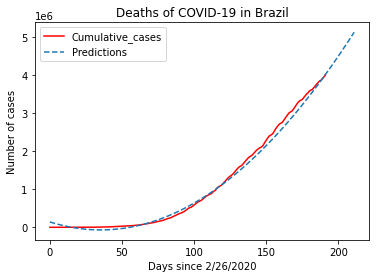

In [120]:
plt.plot(forecast[:-20], y, color='red')
plt.plot(forecast, poly_pred_all, linestyle='dashed')
plt.title('Deaths of COVID-19 in Brazil')
plt.xlabel('Days since 2/26/2020')
plt.ylabel('Number of cases')
plt.legend(['Cumulative_cases', 'Predictions']);